# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [2]:
sdf = pd.read_csv("../datasets/kodex_stock.csv")
bdf = pd.read_csv("../datasets/kodex_bond10y.csv")

In [3]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

# 주식과 투자 몇대몇 비율로 쓰면 최대 이윤

In [4]:
df = pd.DataFrame()

In [5]:
sdf

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0
...,...,...,...,...,...,...
1840,2019-07-17,71210.0,71220.0,71070.0,71080.0,344.0
1841,2019-07-18,71665.0,71665.0,71290.0,71290.0,1516.0
1842,2019-07-19,71770.0,71850.0,71670.0,71670.0,15083.0
1843,2019-07-22,71685.0,71755.0,71685.0,71740.0,1461.0


In [6]:
bdf

,dt,close,high,low,open,volume
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25
...,...,...,...,...,...,...
1840,2019-07-17,27225.0,27340.0,27130.0,27310.0,1886297.00
1841,2019-07-18,27165.0,27260.0,27065.0,27180.0,2290347.00
1842,2019-07-19,27545.0,27610.0,27315.0,27315.0,2532920.00
1843,2019-07-22,27535.0,27620.0,27435.0,27470.0,1797628.00


In [7]:
df['채권수익률'] = np.log1p(bdf['close'].pct_change())

In [8]:
df['주식수익률'] = np.log1p(sdf['close'].pct_change())

In [9]:
df

,채권수익률,주식수익률
0,NaN,NaN
1,0.003443,0.000000
2,0.000953,-0.000601
3,0.001527,0.001401
4,-0.011300,0.002597
...,...,...
1840,-0.008959,0.002179
1841,-0.002206,0.006369
1842,0.013892,0.001464
1843,-0.000363,-0.001185


In [10]:
df.shape[1]

2

In [11]:
annual_ret = df.mean() * 252
daily_cov = df.cov() 
annual_cov = df.cov() * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 
port_sharp = []

stocks = df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(np.dot(weights, annual_cov),weights.T)) 
    sharp = returns/ risk

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 
    port_sharp.append(sharp)

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'sharp': port_sharp,'weight':port_weights} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk','sharp','weight'] + [s for s in stocks]] 
df

,Returns,Risk,sharp,weight,채권수익률,주식수익률
0,0.045563,0.039847,1.143456,"[0.14904238237130354, 0.8509576176286965]",0.149042,0.850958
1,0.026195,0.117887,0.222203,"[0.9167409846675925, 0.08325901533240757]",0.916741,0.083259
2,0.044465,0.040705,1.092368,"[0.19254994871907438, 0.8074500512809257]",0.192550,0.807450
3,0.037160,0.063570,0.584549,"[0.482123972128092, 0.517876027871908]",0.482124,0.517876
4,0.034607,0.075250,0.459894,"[0.5832966151437567, 0.41670338485624336]",0.583297,0.416703
...,...,...,...,...,...,...
19995,0.037525,0.061989,0.605345,"[0.46765697880304424, 0.5323430211969556]",0.467657,0.532343
19996,0.040845,0.049197,0.830237,"[0.33604864461760625, 0.6639513553823938]",0.336049,0.663951
19997,0.035705,0.070108,0.509289,"[0.5397781500103687, 0.4602218499896314]",0.539778,0.460222
19998,0.033446,0.080842,0.413721,"[0.6293226129415809, 0.37067738705841907]",0.629323,0.370677


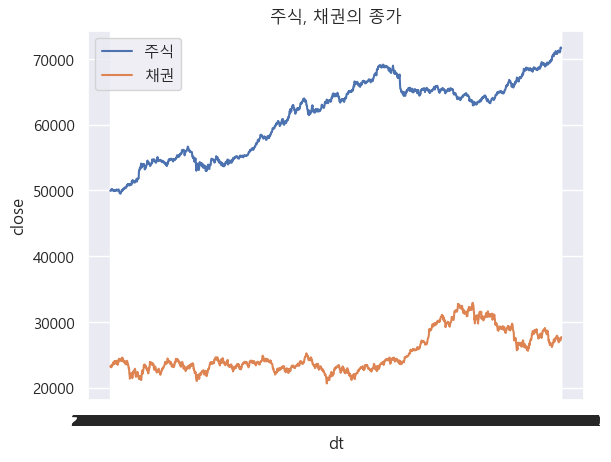

In [12]:
sns.lineplot(x=sdf['dt'], y=sdf['close'], label='주식')
sns.lineplot(x=bdf['dt'], y=bdf['close'], label='채권')
plt.title('주식, 채권의 종가')
plt.legend()
plt.show()

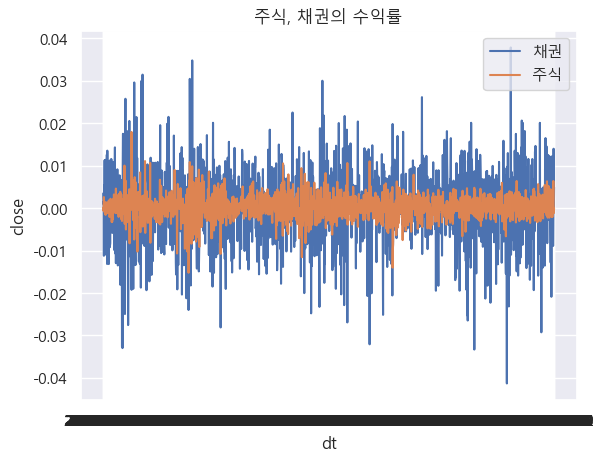

In [13]:
sns.lineplot(x=bdf['dt'], y=bdf['close'].pct_change(), label='채권')
sns.lineplot(x=sdf['dt'], y=sdf['close'].pct_change(), label='주식')

plt.title('주식, 채권의 수익률')
plt.legend()
plt.show()

In [14]:
sharp_max = df['sharp'].max()
sharp_max_df = df[df['sharp'] == sharp_max][['Risk','Returns','weight']]

In [15]:
Returns_max = df['Returns'].max()
Returns_max_df = df[df['Returns'] == Returns_max][['Risk','Returns','weight']]

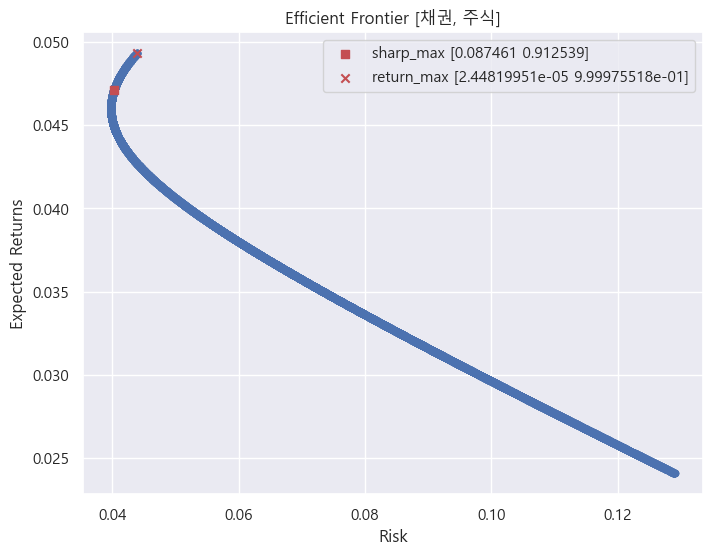

In [16]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.scatter(x = sharp_max_df['Risk'] ,y=sharp_max_df['Returns'],label=f"sharp_max {sharp_max_df['weight'].values[0]}",marker='s',c='r')
plt.scatter(x = Returns_max_df['Risk'] ,y=Returns_max_df['Returns'],label=f"return_max {Returns_max_df['weight'].values[0]}",marker='x',c='r')

plt.title('Efficient Frontier [채권, 주식]') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.legend()
plt.show() 

<AxesSubplot: >

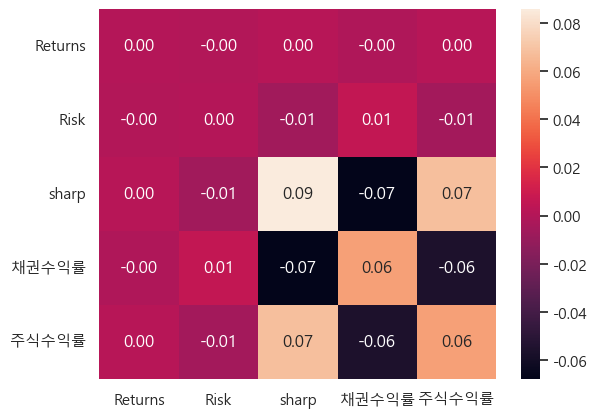

In [17]:
sns.heatmap(df.cov(),annot=True, fmt='.2f')